## CA ASSESSMENT: MACHINE LEARNING AND PATTERN RECOGNITION

SUBMITTED BY:
Elisha Johnson Kyanchat (20002405); 
Peter Chukwuka Ibeabuchi (20007349);
Prashanth Periannan (20001940)


## Phone Price Prediction Analysis

## 1 Introduction

In this notebook, we will investigate the relationship between smartphone features and price. We will analyze data on smartphone features and prices to identify the factors that most strongly influence price. Understanding the factors that influence smartphone prices is important for consumers, manufacturers, and policymakers.

The dataset used for this analysis i gotten from kaggle, you can find it [here](
https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices/data). The column is made up of 22 columns, however for the purpose of our analysis we have selected 17 of those columsn and will be using them in this report.

### 1.2 Aims

The analysis aims to gain insights and make accurate predictions related to phone models. By analyzing relevant data and employing suitable predictive models, our goal is to understand patterns, and develop reliable predictions for Phone prices 

### 1.3 Data features

Here is a brief summary of each columns in the dataset

* Brand: Brand Name
* Model: Model of the Phone
* Battery capacity (mAh): Battery capacity in mAh
* Screen size (inches): Screen Size in Inches across opposite corners
* Touchscreen: Whether the phone is touchscreen supported or not
* Processor: No. of processor cores
* RAM (MB): RAM available in phone in MB
* Internal storage: Internal Storage of phone in GB
* Rear camera: Resolution of rear camera in MP (0 if unavailable)
* Front camera: Resolution of front camera in MP (0 if unavailable)
* Operation system: OS used in phone
* Wi-Fi: Whether phone has WiFi functionality
* Bluetooth: Whether phone has Bluetooth functionality
* Number of SIMs: Number of SIM card slots in phone
* 3G: Whether phone has 3G network functionality
* 4G/LTE: Whether phone has 4G/LTE network functionality
* Price: Price of the phone in INR

### 1.4 Pre- requisites

For this project we would be making use of several libraries, the first set being the usual libraries, Numpy,Pandas for manipulating data and seaborn and Matplotlib for visualization. Then we would be importing several models from sklearn for preprocessing the data and for making predictions.

#### 1.4.1 Importing Libraries

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## 2  Data Wrangling

Here we would be looking at the following:
* loading the data in a pandas dataframe.
* Dropping unnecessary columns
* Examining the general information of the dataset.
* Exploring the data types of each column.


### 2.1 Loading the Data
To load the data we use the pandas function to read csv file, and store the created dataframe in a variable; df

In [2]:
# Reading the dataset
df = pd.read_csv('ndtv_data_final.csv')
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


### 2.2 Dropping Unneeded Columns
The unnamed column has no meaning to it, and is therefore not important to our analysis. Also, the Name column is redundant as the information it carries is already contained in the 'Brand' and 'Model' columns, thus, we do not need it. For this analysis we will be dropping both columns.

In [3]:
#dropping columns that are not useful for the analysis
df = df.drop(['Unnamed: 0','Name'], axis = 1)
df.head()

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,256.0,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,64.0,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,64.0,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,128.0,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


### 2.3 Examining the General Information of the Dataset
For better understanding of our dataset, it is important to get all necessary information of the data.

In [4]:
# getting the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1359 non-null   object 
 1   Model                   1359 non-null   object 
 2   Battery capacity (mAh)  1359 non-null   int64  
 3   Screen size (inches)    1359 non-null   float64
 4   Touchscreen             1359 non-null   object 
 5   Resolution x            1359 non-null   int64  
 6   Resolution y            1359 non-null   int64  
 7   Processor               1359 non-null   int64  
 8   RAM (MB)                1359 non-null   int64  
 9   Internal storage (GB)   1359 non-null   float64
 10  Rear camera             1359 non-null   float64
 11  Front camera            1359 non-null   float64
 12  Operating system        1359 non-null   object 
 13  Wi-Fi                   1359 non-null   object 
 14  Bluetooth               1359 non-null   

#### Observation:
This dataset has 1,359 rows and 20 columns, with no missing values. It contains three data types: four float columns, seven integer columns, and nine object columns.

### 2.4 Exploring the Data Types of Each Columns

In [5]:
# Getting the data types
df.dtypes

Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

## 3 Exploratory Data Analysis (EDA)
In this section we will carry out a brief exploration of the data. This will help us get some descriptive analysis of the data.
In the EDA analysis we would be looking at the following details:
* Univirate analysis
    * Getting the descriptive analysis of the dataset
    * Analysing the categorical variables
    * Analysing the numerical variables
* Bivirate analysis
    * Comparing the best prices for each phone model
    * Comparing the best phone models with each numerical variables
* Multvirate analysis
    * Identifying the relationships between the numberical variables
    * Identifying the re;ationships between all variables in the dataset
    
    
### 3.1 Univirate Analysis

### 3.1.1 Analysing the Categorical Variables
In this section, we will be analysing the categorical variables(i.e those variables with object data types)

#####  a. Analysing popular brands in the dataset

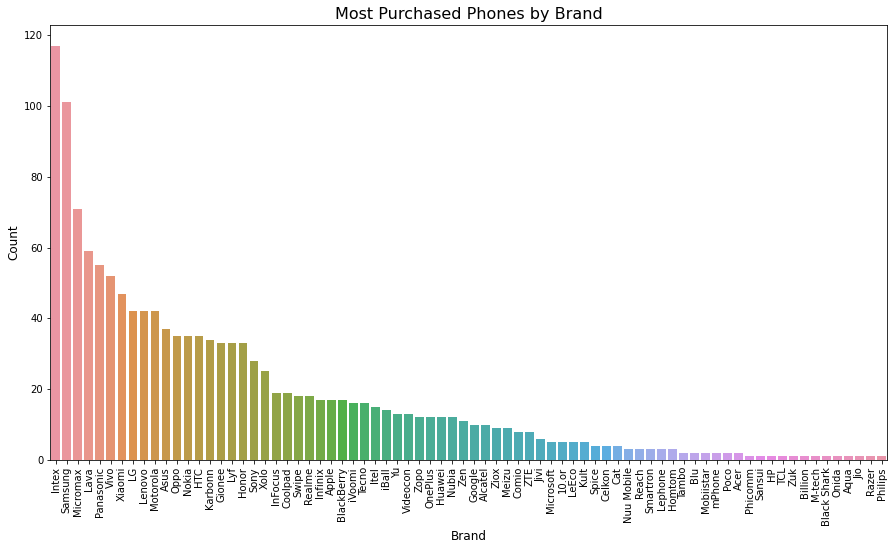

In [6]:
# Plotting a bar chart to show the most purchased phones/ popular phones

# Set the figure size
plt.figure(figsize=(15, 8))

# Create a countplot with seaborn
sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add titles and axis labels
plt.title('Most Purchased Phones by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

#### Observation:
From the chart above we can see that the top 5 most purchased brands in the dataset are Intex, Samsung, Micromax, Lava and Panasonic phone, and the least purchased phones are Onida, Aqua, Jio, Razer and philips.

##### b. Analysing the Most Partronized Operating System
Here, we want to see what operating syste are most sorted after in our dataset.

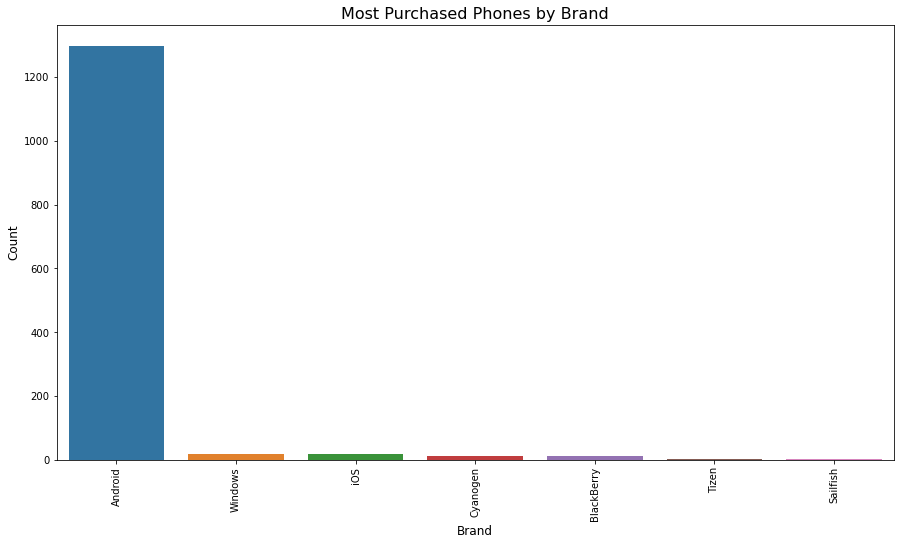

In [7]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create a countplot with seaborn
sns.countplot(x='Operating system', data=df, order=df['Operating system'].value_counts().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add titles and axis labels
plt.title('Most Purchased Phones by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

#### Observation:
From this, we see that a very good percentage of phones use the Andriod operating system.

##### c. Analysing the various object columns
Here, we extract all columns with that are categorical variables(i.e columns with yes and no categories). We are analzing the pecentage and count of these columns and observing their distribution throughout the dataset.

In [8]:
# Select object-type columns except 'Brand', 'Model', and 'Operating system'
Object_columns = df.select_dtypes(include=['object'])
Object_columns = Object_columns.drop(['Brand', 'Model', 'Operating system'], axis=1)

# Display the first few rows of the resulting DataFrame
Object_columns.head()

,Touchscreen,Wi-Fi,Bluetooth,GPS,3G,4G/ LTE
0,Yes,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,Yes,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,Yes,Yes,Yes
4,Yes,Yes,Yes,Yes,No,No


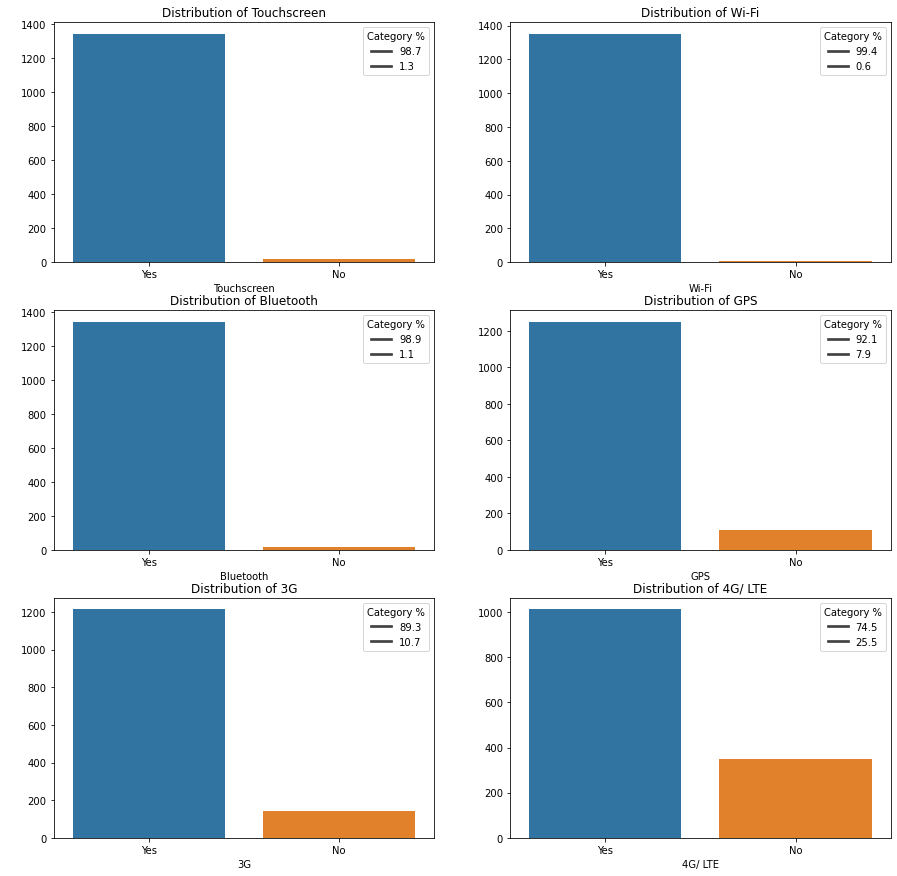

In [9]:
# Plotting a graph to display the distribution of each Object columns

# Create subplots with 3 rows and 2 columns, set the figure size
fig, axarr = plt.subplots(3,2, figsize = (15, 15))
n=0

# Iterate through the Object columns
for j in Object_columns:
    ax = axarr[n // 2, n % 2]
    
    # Plot a bar chart with Seaborn
    sns.barplot(x=df[j].value_counts().index, y=df[j].value_counts(), ax= ax)
    
    # Add a legend showing the percentage of each category
    ax.legend([((x/len(df)*100).round(1)) for x in df[j].value_counts().values], title='Category %')
    
    # Set x-axis label
    ax.set_xlabel(j)
    
    # Set y-axis label as empty
    ax.set_ylabel(" ")
    
    # Set the title for each plot
    ax.set_title(f'Distribution of {j}')
    n += 1

# Display the entire plot
plt.show()

#### Observation: 
* About 99% of the phones have a Touchscreen, Wi-Fi and Bluetooth
* About 92% of the phones have GPS
* About 90% of the phones have 3G, but only 75% of the phones have 4G/LTE


### 3.1.2 Analysing Numerical Variables
In this section we will get the general statistics of the numerical columns. First we will get their distribution in a seaborn histogram, then we use get the overall statistics of the colums.

#### a. Examining the Distribtution of the Numerical Variables
Here, we plot a histogram to vizualize the distribution of each of the numerical columns.


In [10]:
# Select Numerical columns of both floats and integers.
Numerical_columns = df.select_dtypes(include=['int', 'float64'])

#Displaying the first five rows of the numerical columns
Numerical_columns.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


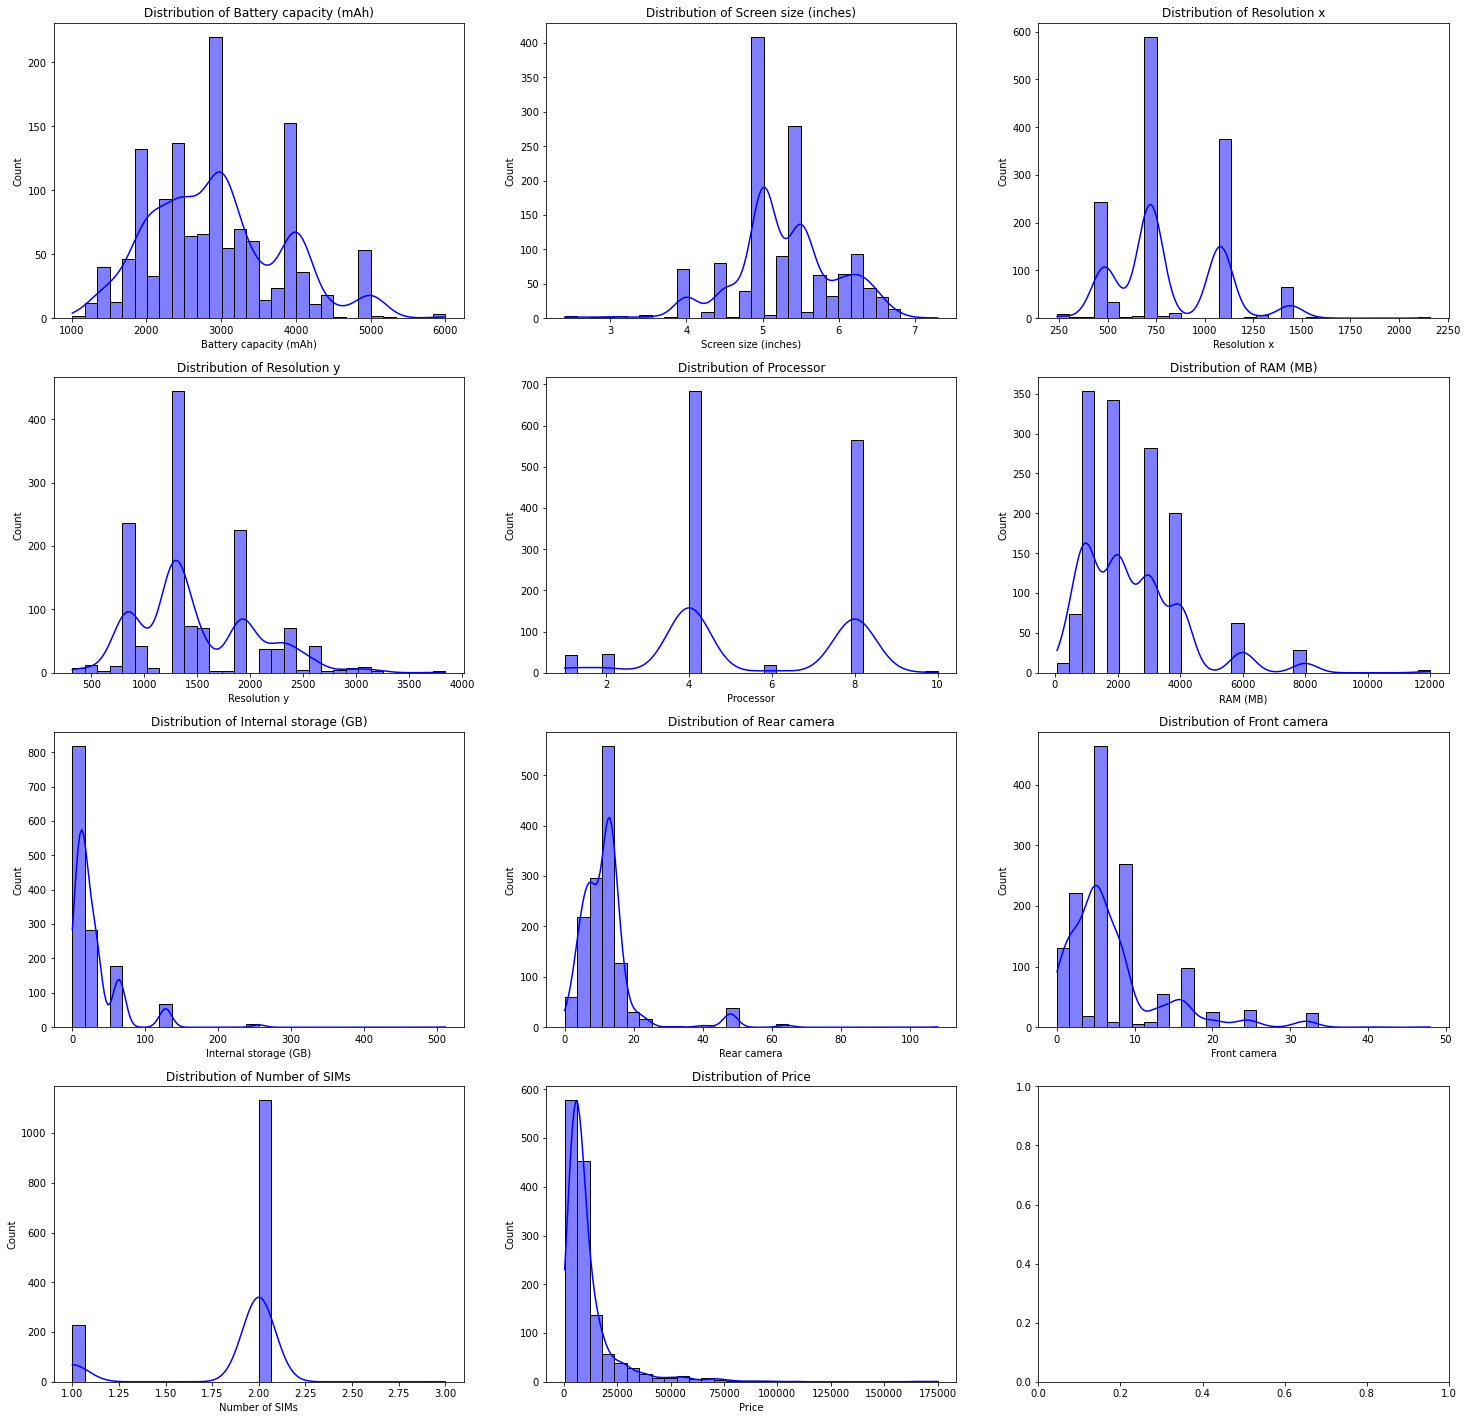

In [11]:
# Create subplots with 4 rows and 3 columns, set the figure size
fig, axarr = plt.subplots(4,3, figsize = (25, 25))
n=0
# Iterate through the selected numerical columns
for i in Numerical_columns:
    ax = axarr[n // 3, n % 3]
    # Create a histogram using Seaborn
    sns.histplot(x=df[i], bins=30, kde=True, color='blue', ax=ax)
    
     # Set a title for the plot
    ax.set_title( f'Distribution of {i}')
    n+=1

# Display the entire plot
plt.show()
    

In [12]:
# Getting the overall statistics of the Numberical data
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


#### Observations
From this analysis we can tell the following: 

1. **Battery Capacity:** The average battery capacity is approximately 2938 mAh, with a minimum of 1010 mAh and a maximum of 6000 mAh. The standard deviation is around 873, indicating some variation in battery sizes.

2. **Screen Size:** The average screen size is about 5.29 inches, with the smallest screen being 2.4 inches and the largest being 7.3 inches.

3. **Resolution (x and y):** The average resolution for both the x and y dimensions is 811 x 1490 pixels, with some variation. The maximum resolution for both dimensions is considerably higher, indicating some devices with high-resolution screens.

4. **Processor:** The average number of processor cores is approximately 5.55, with a minimum of 1 core and a maximum of 10 cores. This suggests a range of processing power among the devices.

5. **RAM:** The average RAM is around 2488 MB (or approximately 2.49 GB). The range of RAM sizes varies from 64 MB to 12,000 MB (or 12 GB).

6. **Internal Storage:** The average internal storage is approximately 30.65 GB, with a minimum of 0.064 GB and a maximum of 512 GB.

7. **Camera (Rear and Front):** The rear camera has an average of 12.07 megapixels, with a minimum of 0 megapixels (possibly indicating missing data) and a maximum of 108 megapixels. The front camera has an average of 7.04 megapixels, with a minimum of 0 megapixels and a maximum of 48 megapixels.

2. **Number of SIMs:** On average, devices have approximately 1.83 SIM slots, suggesting that most devices support dual SIM cards. This is also very evident in the "Number of sims" distribution

4. **Price:** The average price for phone in the dataset is approximately 11,465.83 ruppee. Prices vary widely, with the minimum at 494 ruppees and the maximum at 174,990 ruppees. From the phone distribution we can see that most phones cost below 25000 rupees and very few phones cost above 50,000. To see this clearly we create a range.


In [13]:
#Creating a copy of the dataset
df_copy = df.copy()

# Price ranges for models
df_copy['Price'] = pd.cut(df_copy['Price'], bins=[0, 25000, 45000, 65000, np.inf], include_lowest=True,
                          labels=['0-25k', '26k-45k', '41k-65k', '60k+'])

Phone_range = df_copy['Price'].value_counts()
Phone_range

0-25k      1232
26k-45k      80
41k-65k      27
60k+         20
Name: Price, dtype: int64

Just as stated inititally, we can see that over a thousand(1000) phones cost within the range of 0-25000

### 3.2 Bivariate analysis

#### 3.2.1 Most Expensive Phone Models
Here, we want to identify those phone models that are more prices than the others. To achieve this, we plot a bar chart to get the models with the highest average cost.

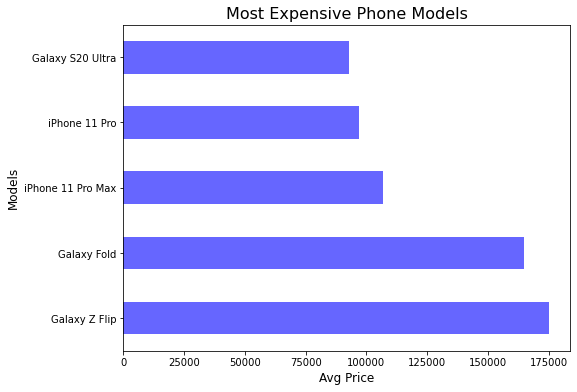

In [14]:
# Grouping the models by their average cost price
Expensive_Phones = df.groupby('Model')['Price'].mean().sort_values(ascending = False).round(2)

# Highlighiting the top 5 most expensive models
Expensive_Phones = Expensive_Phones.head()

# Plotting a bar chart to show the top five models
plt.figure(figsize =(8,6))
Expensive_Phones.plot(kind='barh', color='b', alpha=0.6)

# Adding titles and axis labels
plt.title('Most Expensive Phone Models', fontsize=16)
plt.xlabel('Avg Price', fontsize=12)
plt.ylabel('Models', fontsize=12)

#Displaying the chart
plt.show()


#### Observation:
* On an average, the top most pricey phone models are Galaxy Z flip, Galaxy fold and iPhone 11 pro max, and the cheapest phone are the U12 and Mate 30 pro.


#### 3.2.2 Most Expensive Operating Systems
Here, we want to rank the operating system by the average cost.

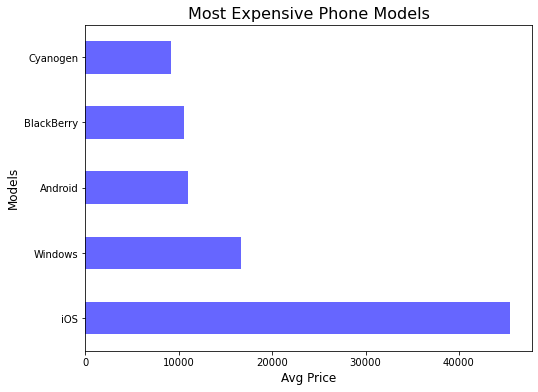

In [15]:
# Grouping the operating systems by the average cost price
Expensive_OS = df.groupby('Operating system')['Price'].mean().sort_values(ascending = False).round(2)

# Highlighting the top 5 most expensive brands
Expensive_OS = Expensive_OS.head()

# Plotting a bar chart to show the top five operating systems
plt.figure(figsize =(8,6))
Expensive_OS.plot(kind='barh', color='b', alpha=0.6)

# Adding titles and axis labels
plt.title('Most Expensive Phone Models', fontsize=16)
plt.xlabel('Avg Price', fontsize=12)
plt.ylabel('Models',fontsize=12)

#Displaying the chart
plt.show()

#### Observations
* iOS phones seems to be the costliest phones in the dataset, followed by windows.

#### 3.2.3 Models With the Best Features
Here, we want to see the phones that have high combination of various features.

In [16]:
# Best battery capacity
categories =['Rear camera', 'Front camera','Internal storage (GB)','Battery capacity (mAh)','Processor','RAM (MB)']

# Looping through the categories
for i in categories:
    j = df.groupby('Model')[i].max().sort_values(ascending = False).head(5)
    print(F'\033[1m Here are the top phone models with the best {i} \033[0m \n{j}')
    print('*'*70)

 Here are the top phone models with the best Rear camera  
Model
Galaxy S20 Ultra    108.0
X2 Pro               64.0
X2                   64.0
XT                   64.0
Redmi Note 8 Pro     64.0
Name: Rear camera, dtype: float64
**********************************************************************
 Here are the top phone models with the best Front camera  
Model
6Z                  48.0
Galaxy S20 Ultra    40.0
V15 Pro             32.0
Galaxy A70s         32.0
V17 Pro             32.0
Name: Front camera, dtype: float64
**********************************************************************
 Here are the top phone models with the best Internal storage (GB)  
Model
Galaxy Fold                   512.0
P30 Pro                       256.0
Galaxy Note 10+               256.0
ZenFone 3 Deluxe (ZS570KL)    256.0
Find X                        256.0
Name: Internal storage (GB), dtype: float64
**********************************************************************
 Here are the top phone models wi

#### Observation:
From the above data drawn out, we can see what device have what specifications. However, there are certain models that have better combinations of these features, thus the present a better model to different users depends on the used case. Here are some highlights:
* Samsung Galaxy S20 Ultra: This model has an outstanding rear camera (108.0 MP), excellent front camera (40.0 MP), a large amount of RAM (12 GB), and a good battery capacity (typically 5000+ mAh). It's suitable for users who prioritize camera quality and performance.

* OnePlus 7T Pro McLaren Edition: This model boasts 12 GB of RAM, a powerful processor, and a good rear camera. It's ideal for users who value performance and multitasking capabilities.

* Samsung Galaxy Fold: With 512 GB of internal storage, it's perfect for users who need ample space for data and applications. It also offers a great combination of features in other categories.

* ASUS 6Z: With a strong front camera (48.0 MP) and good rear camera, it's an excellent choice for photography enthusiasts. It also offers ample RAM and storage.

* Xiaomi Mi Max 2: While it doesn't have the highest camera specs, it presents a great combination of features with a large battery capacity (5300 mAh), substantial RAM, and internal storage.

#### 3.2.4 Comparing Screen Sizes with Phone Resolution
In this section, we want to check the relationship between screen size and screen resolution. 

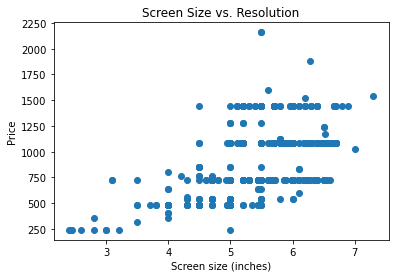

In [17]:
# Scatter plot of screen size vs. price
plt.scatter(df['Screen size (inches)'], df['Resolution x'])
plt.xlabel('Screen size (inches)')
plt.ylabel('Price')
plt.title('Screen Size vs. Resolution')
plt.show()

#### Observation
* The plot shows a positive relationship between screen size and a phones resolution, this means that larger screen tends to have higher resolutions.


### 3.3 Multivariate Analysis
In this section, we will look at the extent to which all the variables in the dataset correlate with each other. To get an overall comparison of all columns in the dataset and examine their correlation, we will plot a correlation heatmap.

##### Identifying the Relationships Between the Numberical Variables

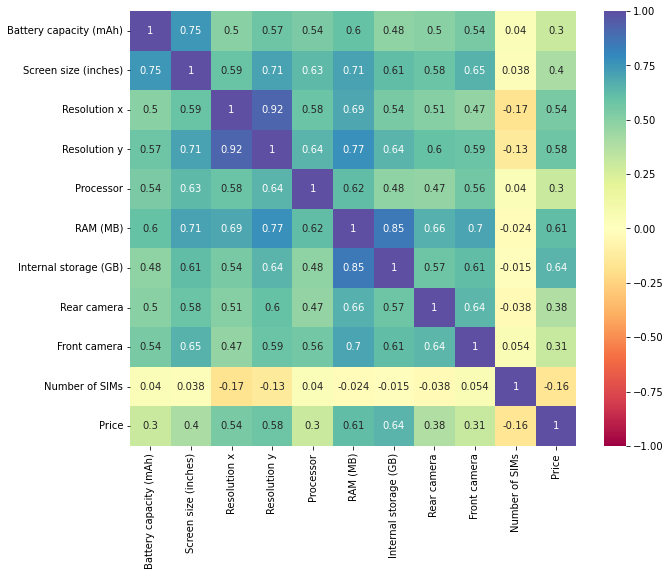

In [18]:
# Plotting a heatmap with seaborn to show the correlation between numeric variables
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

#### Observation:
From this, it is evident that there are quite a number of correlation between most smartphon features. Lets highlight the most significant;
* The strongest positive correlation is between screen size and Resolution y(r =0.92), meaning that there is a very strong linear relationship between the two features.
* Battery capacity is positively correlated with screen size, resolution, processor speed, RAM, internal storage and rear camera resolution. This means that phones with larger batteries tend to have the best of these features. However, we that the battery capacity has a very low correlation with Number of sims, showing that this feature does not have much impact on the capacity of a phones battery.
* The number of sim have very low correlation to all the features.
* Internal storage has a hight positive relationship with Screen Size, Resolution y, RAM, Front Camera and Price.
* The RAM of phones has a high positive relationship all features safe for "Number of sims"
* Price has a high positive relationship with the phones Resolution(both X and Y), the RAM, and internal storage.


We have now seen the correlation with the numerical features. Now we will examine the relationship between all variables in the dataset.

## 4.0 Pre-Processing
In this section we will be getting the dataframe ready for modeling. First we will hotencode the categorical variables in the dataset, Next we will get the correlation of all columns to price, this will guide us on the important features that have relatively more positive or negative correlation to price. 

NB: While there are other preprocessing measures to be carried out, they'll be handled later in the analysis.

### 4.1 Label Encoding
Here, we will hotencode the categorical variables in the dataset using the LabelEncode library.

In [19]:
# Get a list of column names with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate through the object columns and apply label encoding
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,44,49,4085,6.67,1,1440,3120,8,12000,256.0,48.0,16.0,0,1,1,1,2,1,1,58998
1,53,1142,4000,6.50,1,1080,2400,8,6000,64.0,64.0,16.0,0,1,1,1,2,1,1,27999
2,3,1288,3969,6.50,1,1242,2688,6,4000,64.0,12.0,12.0,6,1,1,1,2,1,1,106900
3,3,1286,3110,6.10,1,828,1792,6,4000,64.0,12.0,12.0,6,1,1,1,2,1,1,62900
4,29,522,4000,6.40,1,1080,2340,8,6000,128.0,12.0,32.0,0,1,1,1,1,0,0,49990


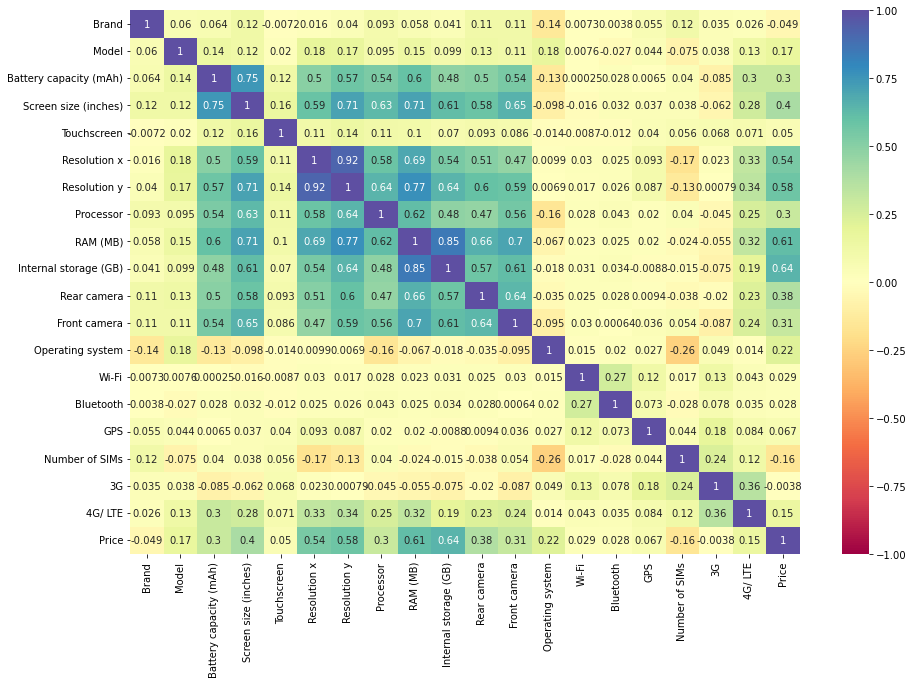

In [20]:
# Plotting a heatmap with seaborn to show the correlation between numeric variables
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

#### Observation:
* Here we see a postive relationship between Wifi and Bluetooth, and also between 4G/LTE and 3G. 
* 4G/LTE also shows a good positive correlation with Resolution(X and Y), as well as RAM.

***** come back here
### 4.2 Feature Selection
Here, we want to select those featires that are highly correlated to price. We consider those features that have above 10%(0.1) relationship with price.

In [21]:
# Highlighting the price column in the heatmap
Price_corr = df.corr()['Price']

# Calculate the absolute correlations between 'Price' and other features
Price_corr = Price_corr.abs().sort_values(ascending = False)

## Select features with an absolute correlation greater than 0.1 (excluding 'Price' itself)
Price_corr = Price_corr[Price_corr > 0.1]

# Display the selected features with strong correlations(excluding Price)
Price_corr[1:]

Internal storage (GB)     0.644079
RAM (MB)                  0.613446
Resolution y              0.576152
Resolution x              0.540711
Screen size (inches)      0.402462
Rear camera               0.379120
Front camera              0.310672
Processor                 0.302492
Battery capacity (mAh)    0.297525
Operating system          0.219978
Model                     0.165451
Number of SIMs            0.162491
4G/ LTE                   0.149792
Name: Price, dtype: float64

## 5.0 Modelling
In this section, we will be creating a model that best predict the price of phones. For this step, we will try three approaches;
* First, we will try a plane model, without selecting any unique feature, and without standardizing the data.We will call this "Plain Modelling".
* For the second model, we will select features that have the most correlation with our data and apply that to our model. We will call this "Selected Feature Modeling"
* Finally, we will standardize our dataset, and apply that to our model. In this part we will standardize both the plain dataset and the selected features dataset.

These processes helps us identfify the best model for our predictions. 

For the purpose of this analysis, we will be using the following models; 
* Linear Regression,
* XGBoost Regressor
* RandomForest Regressor. 

Also, we will be measuring the models performance using the 
* R2Score.
* Mean Squared Error(MSE).
* Mean Absolute Error(MAE).

Steps involved in this section
- Importing important models/libraries
- Creating a copy of the data
- Dividing the dataset into Dependent and independent Variables
- Splitting the dataset into train and test sets
- Writing a function for the model
- Making predictions with specific models.

Here, any model with the best metric scores is the best model and will be our final model.


#### 5.1 Importing Important Models

In [22]:
# Import Linear Regression, XGBoost, and Random Forest
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Import regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import the train split library
from sklearn.model_selection import train_test_split

# Importing the StandardScaler and MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#### 5.2 Creating a Copy of the Dataset

In [23]:
# Creating a copy of the data set
df_pred = df.copy()
df_pred.head()

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,44,49,4085,6.67,1,1440,3120,8,12000,256.0,48.0,16.0,0,1,1,1,2,1,1,58998
1,53,1142,4000,6.50,1,1080,2400,8,6000,64.0,64.0,16.0,0,1,1,1,2,1,1,27999
2,3,1288,3969,6.50,1,1242,2688,6,4000,64.0,12.0,12.0,6,1,1,1,2,1,1,106900
3,3,1286,3110,6.10,1,828,1792,6,4000,64.0,12.0,12.0,6,1,1,1,2,1,1,62900
4,29,522,4000,6.40,1,1080,2340,8,6000,128.0,12.0,32.0,0,1,1,1,1,0,0,49990


#### 5.3 Splitting the Data Into Train and Test Sets

In [24]:
#Splitting the data into train and test set
X = df_pred.drop('Price', axis = 1)
Y = df_pred['Price']

# Getting the shape of the X and Y data
print(X.shape, Y.shape)

(1359, 19) (1359,)


In [25]:
# Splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

#Printing the shape of both the training and testing set to see how they've been split
print("Shape of x_Training set : ", X_train.shape)
print("Shape of x_Test set : ", X_test.shape)
print("Shape of y_Training set : ", Y_train.shape)
print("Shape of y_Test set : ", Y_test.shape)

Shape of x_Training set :  (1087, 19)
Shape of x_Test set :  (272, 19)
Shape of y_Training set :  (1087,)
Shape of y_Test set :  (272,)


#### 5.4 Writing a Function that Evaluates all Models
Here, we will write a function that takes the train and test datasets as well as the model for prediction, and return the metrics for testing the models

In [26]:
# Writting a function for the models

def models(estimator, X_train, X_test, Y_train, Y_test):
    '''
    This function returns a dictionary of regression metrics for the given estimator.
    estimator = the regression model
    X_train = the training dataset features
    X_test = the testing dataset features
    Y_train = the training dataset target
    Y_test = the testing dataset target
    '''
    
    # Fit the estimator on the training data and make predictions
    estimator.fit(X_train, Y_train)
    y_pred = estimator.predict(X_test)
    
    # Calculate the regression metrics
    R2_Score = r2_score(Y_test, y_pred)
    MAE = mean_absolute_error(Y_test, y_pred)
    MSE = mean_squared_error(Y_test, y_pred)
    
    # Create a dictionary to store the metrics
    metric_dict = {
        'R2_Score': round(R2_Score, 2),
        'MAE': round(MAE, 2),
        'MSE': round(MSE, 2)
    }
    
    # Print out the results
    print(f'R2 Score: {R2_Score:.2f}')
    print(f'Mean Absolute Error: {MAE:.2f}')
    print(f'Mean Squared Error: {MSE:.2f}')
    
    # Return the dictionary of metrics
    return metric_dict


### (A) Plain Modeling
For the purpose of comprehension, we have named this session in a simple term. By plain, we are mean training the model without normalizing the data or selecting any specific features. Thus, we will use the original X and Y set already splitted 

#### Linear Regression

In [27]:
# Linear Regression
LR_Regressor= LinearRegression()
LR_metrics = models(LR_Regressor,X_train, X_test, Y_train, Y_test)
LR_metrics

R2 Score: 0.64
Mean Absolute Error: 5188.76
Mean Squared Error: 95015467.31


{'R2_Score': 0.64, 'MAE': 5188.76, 'MSE': 95015467.31}

#### XGBoost Regressor

In [28]:
# XGBoost Regressor
XGB_Regressor= XGBRegressor()
XGB_metrics = models(XGB_Regressor,X_train, X_test, Y_train, Y_test)
XGB_metrics

R2 Score: 0.66
Mean Absolute Error: 4060.37
Mean Squared Error: 88409210.01


{'R2_Score': 0.66, 'MAE': 4060.37, 'MSE': 88409210.01}

#### RandomForest Regressor

In [29]:
# RandomForest Regressor
RF_Regressor= RandomForestRegressor()
RF_metrics = models(RF_Regressor,X_train, X_test, Y_train, Y_test)
RF_metrics

R2 Score: 0.68
Mean Absolute Error: 3915.43
Mean Squared Error: 83873463.34


{'R2_Score': 0.68, 'MAE': 3915.43, 'MSE': 83873463.34}

#### Observation: 
We have successfully gone through all three of our chosen model, with none producing scores that we are confident on. For better scores we try using selected features.

### (B) Feature selection(Modeling)
Here, we are going to use only those features in the dataset that has a high correlation with the dataset. In the previous section, we already identified these features and printed them out. In this section, we will put them in a list and select them as our independent variable. 

It is important to note that that the dependent variable; price(Y) is unchanged.

In [30]:
# Identifying the most correlated features
features = Price_corr[1:]

# putting the features in a list
features = list(features.index.values)

# Displaying the features
features

['Internal storage (GB)',
 'RAM (MB)',
 'Resolution y',
 'Resolution x',
 'Screen size (inches)',
 'Rear camera',
 'Front camera',
 'Processor',
 'Battery capacity (mAh)',
 'Operating system',
 'Model',
 'Number of SIMs',
 '4G/ LTE']

In [31]:
# Selecting the features in out dataset
df_feature = df_pred[features]
df_feature.head()

,Internal storage (GB),RAM (MB),Resolution y,Resolution x,Screen size (inches),Rear camera,Front camera,Processor,Battery capacity (mAh),Operating system,Model,Number of SIMs,4G/ LTE
0,256.0,12000,3120,1440,6.67,48.0,16.0,8,4085,0,49,2,1
1,64.0,6000,2400,1080,6.50,64.0,16.0,8,4000,0,1142,2,1
2,64.0,4000,2688,1242,6.50,12.0,12.0,6,3969,6,1288,2,1
3,64.0,4000,1792,828,6.10,12.0,12.0,6,3110,6,1286,2,1
4,128.0,6000,2340,1080,6.40,12.0,32.0,8,4000,0,522,1,0


In [32]:
# Making the selected feature our independent variable
X_f = df_feature

# Displaying the shape of the dataset
print(X_f.shape)

(1359, 13)


In [33]:
# Splitting data in train and test sets
X_f_train, X_f_test, Y_train, Y_test = train_test_split(X_f, Y, test_size=0.2, random_state= 42)

#Printing the shape of both the training and testing set of the new indpendent variable to see how they've been split
print("Shape of x_Training set : ", X_f_train.shape)
print("Shape of x_Test set : ", X_f_test.shape)


Shape of x_Training set :  (1087, 13)
Shape of x_Test set :  (272, 13)


#### Linear Regression

In [34]:
LR_Regressor= LinearRegression()
LR_f_metrics = models(LR_Regressor,X_f_train, X_f_test, Y_train, Y_test)
LR_f_metrics

R2 Score: 0.64
Mean Absolute Error: 5176.67
Mean Squared Error: 96171676.06


{'R2_Score': 0.64, 'MAE': 5176.67, 'MSE': 96171676.06}

#### XGBoost Regressor

In [36]:
#XGBoost Regressor

XGB_Regressor= XGBRegressor()
XGB_f_metrics = models(XGB_Regressor,X_f_train, X_f_test, Y_train, Y_test)
XGB_f_metrics

R2 Score: 0.67
Mean Absolute Error: 3810.94
Mean Squared Error: 86715611.43


{'R2_Score': 0.67, 'MAE': 3810.94, 'MSE': 86715611.43}

#### Random Forest Regressor

In [37]:
# Randomforest Regressor
RF_f_Regressor= RandomForestRegressor()
RF_f_metrics = models(RF_Regressor,X_f_train, X_f_test, Y_train, Y_test)
RF_f_metrics

R2 Score: 0.68
Mean Absolute Error: 3918.14
Mean Squared Error: 83441472.18


{'R2_Score': 0.68, 'MAE': 3918.14, 'MSE': 83441472.18}

#### Observation
So far, we have gotten better scores from selecting features than we got running the complete dataset. However, the results are still unsatisfactory.

### (C) Normalization
To optimize the models performance, we will be scaling the independent variables in the dataset using the MinMaxScaler() and StandardScaler() normalization methods. This will be done for both the plain dataset, as well as the feature selected dataset.

It is important to note that only the independent variables will be scaled(X, and X_f).

#### (I) Standard Scaler
Here, we will first normalize the plain dataset, then the feature selected dataset, using the standardscaler technique.

###### Normalizing the plain dataset (SD)

In [38]:
# Normalizing the data using standardscaler
std = StandardScaler()
X_std = std.fit_transform(X)

# Spliting the data into test and train dataset
X_train_std, X_test_std, Y_train, Y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 42)

#### Linear Regression

In [39]:
# Linear Regression
LR_Regressor= LinearRegression()
LR_SD_metrics = models(LR_Regressor,X_train_std, X_test_std, Y_train, Y_test)
LR_SD_metrics

R2 Score: 0.64
Mean Absolute Error: 5188.76
Mean Squared Error: 95015467.31


{'R2_Score': 0.64, 'MAE': 5188.76, 'MSE': 95015467.31}

#### XGBoost Regression

In [40]:
# XGBoost Regression
XGB_Regressor= XGBRegressor()
XGB_SD_metrics = models(XGB_Regressor,X_train_std, X_test_std, Y_train, Y_test)
XGB_SD_metrics

R2 Score: 0.67
Mean Absolute Error: 4043.91
Mean Squared Error: 87656406.00


{'R2_Score': 0.67, 'MAE': 4043.91, 'MSE': 87656406.0}

#### RandomForest Regression

In [41]:
# RandomForest Regression
RF_Regressor= RandomForestRegressor()
RF_SD_metrics = models(RF_Regressor,X_train_std, X_test_std, Y_train, Y_test)
RF_SD_metrics

R2 Score: 0.68
Mean Absolute Error: 3881.22
Mean Squared Error: 83131421.19


{'R2_Score': 0.68, 'MAE': 3881.22, 'MSE': 83131421.19}

#### Observation
The scores in this section has not produced better scores than our previous predictions. We will proceed to scale the selected feature dataset using standardscaler

###### Normalizing Feature selected datasets(SF)

In [42]:
## Scaling with features
X_f_std = std.fit_transform(X_f)

# Splitting the data into test and train set
X_train_std_feat, X_test_std_feat, Y_train, Y_test = train_test_split(X_f_std, Y, test_size = 0.2, random_state = 42)

#### Linear Regression

In [43]:
# Linear Regression
LR_Regressor= LinearRegression()
LR_SF_metrics = models(LR_Regressor,X_train_std_feat, X_test_std_feat, Y_train, Y_test)
LR_SF_metrics

R2 Score: 0.64
Mean Absolute Error: 5176.67
Mean Squared Error: 96171676.06


{'R2_Score': 0.64, 'MAE': 5176.67, 'MSE': 96171676.06}

#### XGBoost Regression

In [44]:
# XGBoost Regression
XGB_Regressor= XGBRegressor()
XGB_SF_metrics = models(XGB_Regressor,X_train_std_feat, X_test_std_feat, Y_train, Y_test)
XGB_SF_metrics

R2 Score: 0.64
Mean Absolute Error: 3856.21
Mean Squared Error: 93788031.07


{'R2_Score': 0.64, 'MAE': 3856.21, 'MSE': 93788031.07}

#### RandomForest Regression

In [45]:
# RandomForest Regression
RF_Regressor= RandomForestRegressor()
RF_SF_metrics = models(RF_Regressor,X_train_std_feat, X_test_std_feat, Y_train, Y_test)
RF_SF_metrics

R2 Score: 0.68
Mean Absolute Error: 3942.66
Mean Squared Error: 84184379.47


{'R2_Score': 0.68, 'MAE': 3942.66, 'MSE': 84184379.47}

#### (II) MinMax Scaler
Just as the previous section, we will scale both datasets using the MinMax scaler technique

###### Normalizing the Plain Dataset (MM)

In [46]:
# Normalizing the plain data using MinMaxscaler
min_max = MinMaxScaler()
X_mm = min_max.fit_transform(X)

# Splitting the data into test and train set
X_train_mm, X_test_mm, Y_train, Y_test = train_test_split(X_mm, Y, test_size = 0.20, random_state = 42)

#### Linear Regression

In [47]:
#Linear Regression
LR_Regressor= LinearRegression()
LR_mm_metrics = models(LR_Regressor,X_train_mm, X_test_mm, Y_train, Y_test)
LR_mm_metrics

R2 Score: 0.64
Mean Absolute Error: 5188.76
Mean Squared Error: 95015467.31


{'R2_Score': 0.64, 'MAE': 5188.76, 'MSE': 95015467.31}

#### XGBoost Regressor

In [48]:
# XGBoost Regression
XGB_Regressor= XGBRegressor()
XGB_mm_metrics = models(XGB_Regressor,X_train_mm, X_test_mm, Y_train, Y_test)
XGB_mm_metrics

R2 Score: 0.66
Mean Absolute Error: 4059.09
Mean Squared Error: 88399080.85


{'R2_Score': 0.66, 'MAE': 4059.09, 'MSE': 88399080.85}

#### RandomForest Regression

In [49]:
#Randomforest Regression
RF_Regressor= RandomForestRegressor()
RF_mm_metrics = models(RF_Regressor,X_train_mm, X_test_mm, Y_train, Y_test)
RF_mm_metrics

R2 Score: 0.67
Mean Absolute Error: 3856.61
Mean Squared Error: 86803221.96


{'R2_Score': 0.67, 'MAE': 3856.61, 'MSE': 86803221.96}

##### Normalizing selected feature dataset (MF)

In [50]:
# Normalizing the Selected feature data using MinMaxscaler
X_mf_feat = min_max.fit_transform(X_f)

# Splitting the data into test and train set
X_train_mf_feat, X_test_mf_feat, Y_train, Y_test = train_test_split(X_mf_feat, Y, test_size = 0.2, random_state = 42)

#### Linear Regression

In [52]:
# Linear Regression
LR_Regressor= LinearRegression()
LR_mf_metrics = models(LR_Regressor,X_train_mf_feat, X_test_mf_feat, Y_train, Y_test)
LR_mf_metrics

R2 Score: 0.64
Mean Absolute Error: 5176.67
Mean Squared Error: 96171676.06


{'R2_Score': 0.64, 'MAE': 5176.67, 'MSE': 96171676.06}

#### XGBoost Regression

In [53]:
#XGBoost Regression
XGB_Regressor= XGBRegressor()
XGB_mf_metrics = models(XGB_Regressor,X_train_mf_feat, X_test_mf_feat, Y_train, Y_test)
XGB_mf_metrics

R2 Score: 0.64
Mean Absolute Error: 3873.22
Mean Squared Error: 94554337.23


{'R2_Score': 0.64, 'MAE': 3873.22, 'MSE': 94554337.23}

#### RandomForest Regression

In [54]:
#RandomForest Regression
RF_Regressor= RandomForestRegressor()
RF_mf_metrics = models(RF_Regressor,X_train_mf_feat, X_test_mf_feat, Y_train, Y_test)
RF_mf_metrics

R2 Score: 0.69
Mean Absolute Error: 3867.66
Mean Squared Error: 81643480.72


{'R2_Score': 0.69, 'MAE': 3867.66, 'MSE': 81643480.72}

### 6.0 MODEL Comparison
We have now observed a various performance results from various models. It is important to examine what model produced the best results. To achieve this, we create a table to show all the results.

In [62]:
#Creating a table to show all the Regressors

# Listing out all the metrics for the different model
A = [LR_metrics, XGB_metrics, RF_metrics, LR_f_metrics, XGB_f_metrics, RF_f_metrics, LR_SD_metrics,
    XGB_SD_metrics, RF_SD_metrics, LR_SF_metrics, XGB_SF_metrics, RF_SF_metrics, LR_mm_metrics, XGB_mm_metrics,
    RF_mm_metrics, LR_mf_metrics, XGB_mf_metrics, RF_mf_metrics]

# Listing each Row name for our models
Name = ['LR_metrics(Plain)', 'XGB_metrics(Plain)','Rf_metrics(Plain)','LR_metrics(FS)','XGB_metrics(FS)','RF_metrics(FS)',
       'LR_metrics(SD)', 'XGB_metrics(SD)', 'RF_metrics(SD)', 'LR_metrics(SF)', 'XGB_metrics(SF)', 'RF_metrics(SF)',
        'LR_metrics(MM)', 'XGB_metrics(MM)','RF_metrics(MM)','LR_metrics(MF)', 'XGB_metrics(MF)', 'RF_metrics(MF)']
List = []
for name, metrics in zip(Name, A):
    R2_Score = metrics['R2_Score']* 100
    MAE = metrics['MAE']
    MSE = metrics['MSE']
    
    #Appending the results to a list
    List.append({'Model': name,
                 'R2_Score(%)': R2_Score,
                 'MAE': MAE,
                 'MSE': MSE})

#Creating a dataframe for the list
List = pd.DataFrame(List).set_index('Model')
List

,R2_Score(%),MAE,MSE
Model,,,
LR_metrics(Plain),64.0,5188.76,95015467.31
XGB_metrics(Plain),66.0,4060.37,88409210.01
Rf_metrics(Plain),68.0,3915.43,83873463.34
LR_metrics(FS),64.0,5176.67,96171676.06
XGB_metrics(FS),67.0,3810.94,86715611.43
RF_metrics(FS),68.0,3918.14,83441472.18
LR_metrics(SD),64.0,5188.76,95015467.31
XGB_metrics(SD),67.0,4043.91,87656406.00
RF_metrics(SD),68.0,3881.22,83131421.19


#### Observation:
Considering the overall performance across various preprocessing techniques, the RF_metrics(MF) appears to be the most robust and accurate, achieving the highest R2 score and demonstrating the lowest MAE and MSE. However, these scores can be improved on, and our models can be optimized to produce even better results.

### Conclusion:
We have now evaluated several models to enable us predict the prices of smart phones, and made active progress in achieving the best model to help us accurately predict the prices. We do recommend that other options are considered to optimize the model performance.